In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import itertools

from sklearn.model_selection import cross_val_score, train_test_split, KFold

import statsmodels.formula.api as smf

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, LogisticRegression, HuberRegressor, RANSACRegressor
from sklearn.metrics import r2_score, confusion_matrix, roc_curve, auc, roc_auc_score

from sklearn.preprocessing import StandardScaler

import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore scikit-learn ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
df = pd.read_csv("df_final.csv")

In [54]:
nonreg_mod = smf.ols(formula = 'ln_stress~year+agriculture_water+industry_water+domestic_water+water_per_capita+urban_population+state_capacity+cattle+total_withdrawals+cereal_yield+control_of_corruption+hydro_electricity+permanent_cropland+population_density', data = df).fit()
nonreg_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ln_stress   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     251.7
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:30:11   Log-Likelihood:                -3796.4
No. Observations:                2396   AIC:                             7623.
Df Residuals:                    2381   BIC:                             7710.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                48.5995     10.743      4.524      0.000      27.534      69.665
year                     -0.0243      0.005     -4.543      0.000      -0.035      -0.014
agriculture_water         3.4225      0.672      5.094      0.000       2.105       4.740
industry_water            1.4588      0.675      2.162      0.031       0.136       2.782
domestic_water           -0.7301      0.655     -1.115      0.265      -2.014       0.554
water_per_capita         -5.2225      0.232    -22.502      0.000      -5.678      -4.767
urban_population          1.6691      0.136     12.237      0.000       1.402       1.937
state_capacity           -0.0623      0.302     -0.206      0.837      -0.655       0.531
cattle                   -1.8998      0.315     -6.036      0.000      -2.517      -1.283
total_withdrawals         1.9507      0.374      5.211      0.000       1.217       2.685
cereal_yield              7.2922      0.405     17.986      0.000       6.497       8.087
control_of_corruption    -0.1495      0.221     -0.676      0.499      -0.583       0.284
hydro_electricity        -1.5943      0.104    -15.399      0.000      -1.797      -1.391
permanent_cropland       -1.1536      0.161     -7.153      0.000      -1.470      -0.837
population_density        4.6274      0.348     13.282      0.000       3.944       5.311
==============================================================================
Omnibus:                       53.264   Durbin-Watson:                   0.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.168
Skew:                           0.264   Prob(JB):                     3.52e-16
Kurtosis:                       3.659   Cond. No.                     8.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
df.columns

Index(['country', 'code', 'year', 'stress', 'agriculture_water',
       'industry_water', 'domestic_water', 'water_per_capita',
       'urban_population', 'state_capacity', 'cattle', 'total_withdrawals',
       'cereal_yield', 'control_of_corruption', 'hydro_electricity',
       'permanent_cropland', 'population_density', 'ln_stress'],
      dtype='object')

In [72]:
features_matrix = df[['year', 'agriculture_water',
       'industry_water', 'domestic_water', 'water_per_capita',
       'urban_population', 'state_capacity', 'cattle', 'total_withdrawals',
       'cereal_yield', 'control_of_corruption', 'hydro_electricity',
       'permanent_cropland', 'population_density']]

target_array = df['ln_stress']

In [31]:
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(df_2015[["agriculture_water","industry_water","domestic_water","water_per_capita","urban_population","state_capacity","cattle","total_withdrawals","cereal_yield","control_of_corruption","hydro_electricity","permanent_cropland","population_density"]])
# df_2015_features[["agriculture_water","industry_water","domestic_water","water_per_capita","urban_population","state_capacity","cattle","total_withdrawals","cereal_yield","control_of_corruption","hydro_electricity","permanent_cropland","population_density"]] = scaled_features

model_1 = LinearRegression()
cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
test_fold_r2 = cross_val_score(model_1, features_matrix, target_array, cv=cross_val, scoring="r2")
print(f"Test fold R^2 Values: {test_fold_r2}")
print(f"Test fold R^2 Mean: {test_fold_r2.mean()}")
print(f"Test fold R^2 STD: {test_fold_r2.std()}")

Test fold R^2 Values: [0.59364218 0.58587946 0.60210839 0.58657747 0.58875439]
Test fold R^2 Mean: 0.5913923783541138
Test fold R^2 STD: 0.006007149214180662


Lambda  Mean Test R^2
0     0.0       0.591392

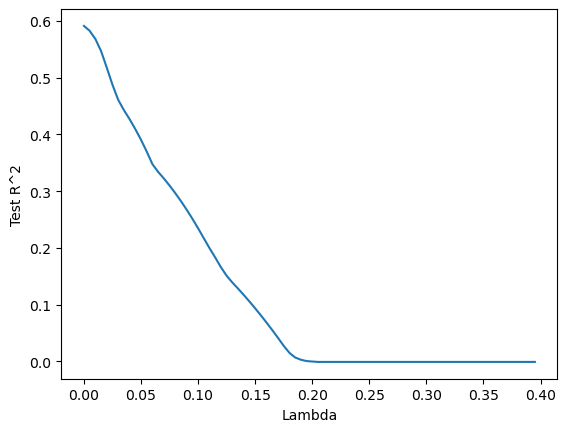

In [32]:
# LASSO Model with Cross Validation
data = []
for i in np.arange(0.0,0.4,0.005):
    temp_model = Lasso(i, max_iter=1000)
    cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
    test_fold_r2 = cross_val_score(temp_model, features_matrix, target_array, cv=cross_val, scoring="r2")
    data.append([i, test_fold_r2.mean()])
results_lasso = pd.DataFrame(data, columns=['Lambda', "Mean Test R^2"])
plt.plot(results_lasso['Lambda'].values, results_lasso['Mean Test R^2'].values)
plt.xlabel("Lambda")
plt.ylabel("Test R^2")

results_lasso.nlargest(1,"Mean Test R^2")

/Users/benleidig/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/benleidig/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/benleidig/miniconda3/lib/python3.11/site-packages/sklearn/base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/benleidig/miniconda3/lib/python3.11/site-packages/sklearn/linear_

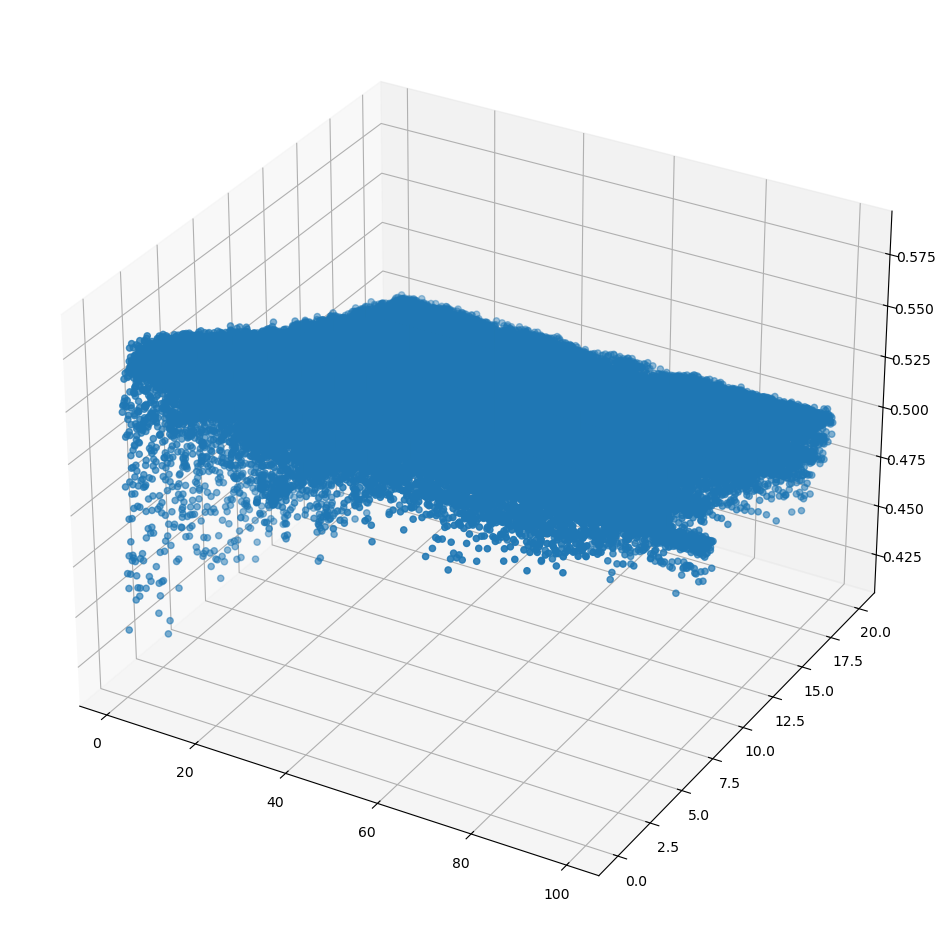

Sigma  Lambda  Mean Test R^2
120    61.0     0.0       0.583747
1766   92.0     0.4       0.583379
94     48.0     0.0       0.583357

In [96]:
data = []
for i in np.arange(0,20,0.05):
    for a in np.arange(1,100,0.5):
        temp_model = HuberRegressor(epsilon=a, alpha=i, max_iter=1000)
        cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
        test_fold_r2 = cross_val_score(temp_model, features_matrix, target_array, cv=cross_val, scoring="r2")
        data.append([a, i, test_fold_r2.mean()])
results_huber = pd.DataFrame(data, columns=['Sigma', 'Lambda', "Mean Test R^2"])
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(results_huber['Sigma'], results_huber['Lambda'], results_huber['Mean Test R^2'])
plt.show()

results_huber.nlargest(3,"Mean Test R^2")


Sigma	Lambda	Mean Test R^2
82	42.0	1.0	0.576962

In [97]:
huber_mod = HuberRegressor(epsilon = 61, alpha=0, max_iter=1000)
cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
test_fold_r2 = cross_val_score(huber_mod, features_matrix, target_array, cv=cross_val, scoring="r2")
print(f"Test fold R^2 Values: {test_fold_r2}")
print(f"Test fold R^2 Mean: {test_fold_r2.mean()}")
print(f"Test fold R^2 STD: {test_fold_r2.std()}")

Test fold R^2 Values: [0.58557939 0.57166726 0.59940175 0.57415006 0.5879378 ]
Test fold R^2 Mean: 0.5837472552661485
Test fold R^2 STD: 0.01004005043142719


In [98]:
huber_mod.fit(features_matrix, target_array) 
print('coefficients:', huber_mod.coef_)
print('intercept:', huber_mod.intercept_)

coefficients: [ 4.51952205e-04  2.27105494e+00 -4.84360443e-01 -1.81271915e+00
 -8.96929430e-01  1.43345785e+00  7.65797892e-01  2.19886176e-01
  4.86478758e-01  5.55398473e-01  7.90908549e-01 -2.14642547e+00
 -6.26852609e-02  3.37987581e-01]
intercept: 0.0008481344470084162


In [99]:
huber_mod.fit(features_matrix, target_array)
df_slopes = pd.DataFrame({"Slope": huber_mod.coef_.T}, index=features_matrix.columns)
df_slopes

Slope
year                   0.000452
agriculture_water      2.271055
industry_water        -0.484360
domestic_water        -1.812719
water_per_capita      -0.896929
urban_population       1.433458
state_capacity         0.765798
cattle                 0.219886
total_withdrawals      0.486479
cereal_yield           0.555398
control_of_corruption  0.790909
hydro_electricity     -2.146425
permanent_cropland    -0.062685
population_density     0.337988

In [ ]:
ransac_mod = RANSACRegressor(epsilon = 77.1, alpha=0, max_iter=1000)
cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
test_fold_r2 = cross_val_score(huber_mod, features_matrix, target_array, cv=cross_val, scoring="r2")
print(f"Test fold R^2 Values: {test_fold_r2}")
print(f"Test fold R^2 Mean: {test_fold_r2.mean()}")
print(f"Test fold R^2 STD: {test_fold_r2.std()}")

## Logistic Classifier

In [36]:
df['high_stress'] = 1 * (df.loc[:, 'stress'] >= 40)

In [38]:
def plot_roc(fpr, tpr, auc, lw = 2):
    plt.plot(fpr, tpr, color = 'darkorange', lw = lw, label = 'ROC curve (area = '+str(round(auc, 3))+')')
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc = 'lower right')
    plt.show()

In [39]:
def fpr_tpr_thresh(y, pred_prob, thresh):
    yhat = 1 * (pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true = y, y_pred = yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold': [thresh],
                         'fpr': [fpr],
                         'tpr': [tpr]
                         })

In [40]:
# Define the model
model = LogisticRegression()

# Define your list of explanatory variables
explanatory_variables = ['agriculture_water', 'industry_water', 'domestic_water', 'water_per_capita', 'urban_population', 'state_capacity', 'cattle', 'total_withdrawals', 'cereal_yield', 'control_of_corruption', 'hydro_electricity', 'permanent_cropland', 'population_density']

features_matrix = df[explanatory_variables]
target_array = df['high_stress']

best_auc = 0  # Initialize the best AUC value
best_combination = None  # Initialize the best combination of variables

# Define the number of folds for cross-validation
n_folds = 5
kf = KFold(n_splits=n_folds)

# Generate all possible combinations of explanatory variables
for r in range(1, len(explanatory_variables) + 1):
    for combination in itertools.combinations(explanatory_variables, r):
        # Create a list of selected variables
        selected_variables = list(combination)
        total_auc = 0  # Initialize total AUC for this combination

        # Perform k-fold cross-validation
        for train_index, test_index in kf.split(features_matrix):
            X_train, X_test = features_matrix.iloc[train_index][selected_variables], features_matrix.iloc[test_index][selected_variables]
            y_train, y_test = target_array.iloc[train_index], target_array.iloc[test_index]

            # Fit your model with the selected variables and calculate AUC
            model.fit(X_train, y_train)
            pred_prob = model.predict_proba(X_test)[:, 1]
            auc_score = roc_auc_score(y_test, pred_prob)
            total_auc += auc_score

        # Calculate average AUC across all folds
        avg_auc = total_auc / n_folds

        # If the average AUC for this combination is better than the previous best, update the best values
        if avg_auc > best_auc:
            best_auc = avg_auc
            best_combination = selected_variables

# Print the best combination of variables and its AUC
print("Best combination of variables:", best_combination)
print("Average ROC AUC with k-fold cross-validation:", best_auc)

Best combination of variables: ['water_per_capita', 'cattle', 'total_withdrawals']
Average ROC AUC with k-fold cross-validation: 0.8541853819165475


Optimization terminated successfully.
         Current function value: 0.416809
         Iterations 10


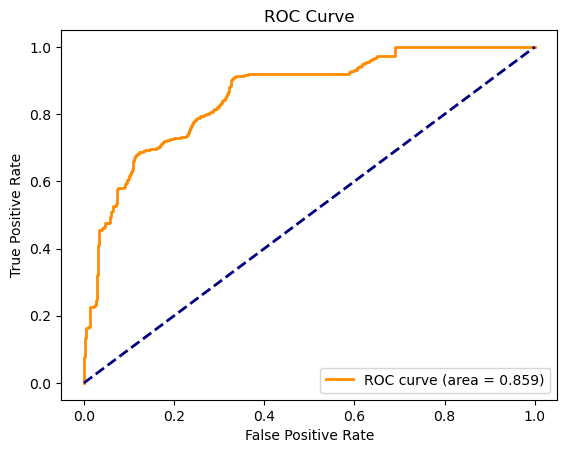

In [42]:
log_mod = smf.logit(formula = 'high_stress~water_per_capita+cattle+total_withdrawals', data = df).fit()
df['predictive_prob'] = log_mod.predict(df)
fprs, tprs, thresholds = roc_curve(y_true = df['high_stress'], y_score = df['predictive_prob'])
auc = roc_auc_score(y_true = df['high_stress'], y_score = df['predictive_prob'])
plot_roc(fprs, tprs, auc)

In [43]:
for thresh in np.arange(0, 1.01, .01):
    print(fpr_tpr_thresh(df['high_stress'], df['predictive_prob'], thresh))

   threshold  fpr  tpr
0        0.0  1.0  1.0
   threshold       fpr       tpr
0       0.01  0.689789  0.973064
   threshold       fpr       tpr
0       0.02  0.663152  0.973064
   threshold       fpr       tpr
0       0.03  0.653718  0.973064
   threshold       fpr       tpr
0       0.04  0.649279  0.973064
   threshold       fpr       tpr
0       0.05  0.623751  0.952862
   threshold       fpr       tpr
0       0.06  0.609878  0.939394
   threshold       fpr       tpr
0       0.07  0.598224  0.929293
   threshold      fpr       tpr
0       0.08  0.59101  0.925926
   threshold       fpr       tpr
0       0.09  0.580466  0.919192
   threshold       fpr       tpr
0        0.1  0.572697  0.919192
   threshold       fpr       tpr
0       0.11  0.569367  0.919192
   threshold       fpr       tpr
0       0.12  0.564373  0.919192
   threshold       fpr       tpr
0       0.13  0.561598  0.919192
   threshold       fpr       tpr
0       0.14  0.553829  0.919192
   threshold       fpr       tpr

In [44]:
pred_prob = log_mod.predict(df)
df['predictive_prob'] = pred_prob
pred_prob

0       0.348167
1       0.355600
2       0.351871
3       0.368073
4       0.369627
          ...   
2391    0.233537
2392    0.233986
2393    0.234850
2394    0.264879
2395    0.260678
Length: 2396, dtype: float64

In [45]:
df['high_stress_hat'] = 1 * (df['predictive_prob'] >= 0.28)
df[['high_stress', 'high_stress_hat', 'predictive_prob']].head()

high_stress  high_stress_hat  predictive_prob
0            1                1         0.348167
1            1                1         0.355600
2            1                1         0.351871
3            1                1         0.368073
4            1                1         0.369627

In [46]:
confusion_matrix(y_true = df['high_stress'], y_pred = df['high_stress_hat'])

array([[1207,  595],
       [  56,  538]])

In [47]:
print('Specificity (TNR): ', 1207 / (1207 + 595))
print('Sensitivity (TPR): ', 538 / (538 + 56))

Specificity (TNR):  0.6698113207547169
Sensitivity (TPR):  0.9057239057239057


In [51]:
log_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            high_stress   No. Observations:                 2396
Model:                          Logit   Df Residuals:                     2392
Method:                           MLE   Df Model:                            3
Date:                Sun, 14 Apr 2024   Pseudo R-squ.:                  0.2557
Time:                        14:20:39   Log-Likelihood:                -998.68
converged:                       True   LL-Null:                       -1341.8
Covariance Type:            nonrobust   LLR p-value:                1.944e-148
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.1476      0.075     -1.964      0.050      -0.295      -0.000
water_per_capita   -101.0526      8.826    -11.450      0.000    -118.350     -83.755
cattle              -11.4387      1.430     -8.001      0.000     -14.241      -8.637
total_withdrawals    14.9182      1.458     10.229      0.000      12.060      17.777
=====================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""